In [1]:
# Regression Analysis for House Prices on dummy dataset
# -------------------------------------------------
# Author     : Siva Pranesh
# E-Mail     : sivapranesh.contact@gmail.com
# -------------------------------------------------

## Import the Libraries and Data

In [2]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Since we are going to make lot of visualization, let's set some visualization parameters in order to have same plots size
pd.set_option('max_rows', None)
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [4]:
house = pd.read_csv('C:/Users/sivapr/Documents/Cops/ML Project/LearnBay/Maison.csv')

In [5]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [6]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [8]:
round(house.describe(),2)

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.00,546.00,546.00,546.00,546.00,546.00,546.00,546.00,546.00,546.00,546.00,546.00
mean,68121.60,5150.27,2.97,1.29,1.81,0.86,0.18,0.35,0.05,0.32,0.69,0.23
std,26702.67,2168.16,0.74,0.50,0.87,0.35,0.38,0.48,0.21,0.47,0.86,0.42
min,25000.00,1650.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49125.00,3600.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,62000.00,4600.00,3.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,82000.00,6360.00,3.00,2.00,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
max,190000.00,16200.00,6.00,4.00,4.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00


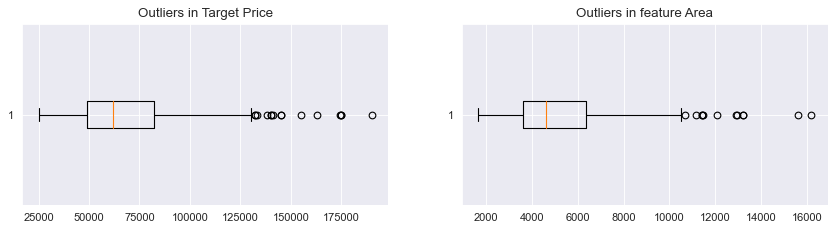

In [9]:
plt.figure(figsize=(13,3),dpi=80)

plt.subplot(121)
plt.boxplot(data=house, x='price',vert=False)
plt.title('Outliers in Target Price')

plt.subplot(122)
plt.boxplot(data=house, x='area',vert=False)
plt.title('Outliers in feature Area')

plt.show()

Boxplot explains that there are outliers in both the 'Area' and 'Price' which should be cleaned up

In [10]:
# Function to identify outliers
def outlier(data):
    median_ = np.percentile(data,[50])
    Q1 = np.percentile(data,[25])
    Q3 = np.percentile(data,[75])
    IQR = Q3-Q1
    upper_outlier = Q3 + 1.5 * IQR 
    lower_outlier = Q1 - 1.5 * IQR 
    return lower_outlier, upper_outlier

In [11]:
display(outlier(house['price']))
display(outlier(house['area']))

(array([-187.5]), array([131312.5]))

(array([-540.]), array([10500.]))

The above function returns the lower and upper range of boxplot, which can be removed from the dataset

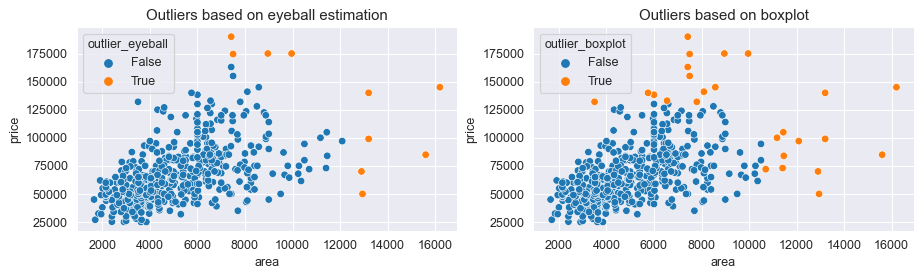

In [12]:
plt.figure(figsize=(12,3),dpi=90)
plt.subplot(121)
house['outlier_eyeball'] = (house['area'] > 12500) | (house['price'] > 174000)
sns.scatterplot(data=house,x='area',y='price',hue='outlier_eyeball')
plt.title('Outliers based on eyeball estimation')

plt.subplot(122)
house['outlier_boxplot'] = (house['area'] > 10500) | (house['price'] > 131312.5)
sns.scatterplot(data=house,x='area',y='price',hue='outlier_boxplot')
plt.title('Outliers based on boxplot')

plt.show()

1. Visualizing outliers based on eyeball estimation
2. Visualizing outliers based on statistical boxplot

In [13]:
house_df1 = house.loc[house['outlier_eyeball'] == False]
house_df2 = house.loc[house['outlier_boxplot'] == False]
house_df1.shape,house_df2.shape
print('Number of outlier rows dropped are',(house_df1.shape[0]-house_df2.shape[0]))

Number of outlier rows dropped are 15


In [14]:
from sklearn.linear_model import LinearRegression

X1 = house_df1['area'].values.reshape(-1,1)
y1 = house_df1['price'].values.reshape(-1,1)
lr1 = LinearRegression().fit(X1,y1)
print('The R-squared is',round(lr1.score(X1,y1),3))

X2 = house_df2['area'].values.reshape(-1,1)
y2 = house_df2['price'].values.reshape(-1,1)
lr2 = LinearRegression().fit(X2,y2)
print('The R-squared is',round(lr2.score(X2,y2),3))

The R-squared is 0.282
The R-squared is 0.283


Though the R-squared has marginally improved, yet the improvement explains that removing outliers statistically makes more sense, than eyeball estimation.

In [15]:
house_df2.drop(columns=['outlier_eyeball','outlier_boxplot'],axis=1,inplace=True)
house_df2.reset_index(drop=True);

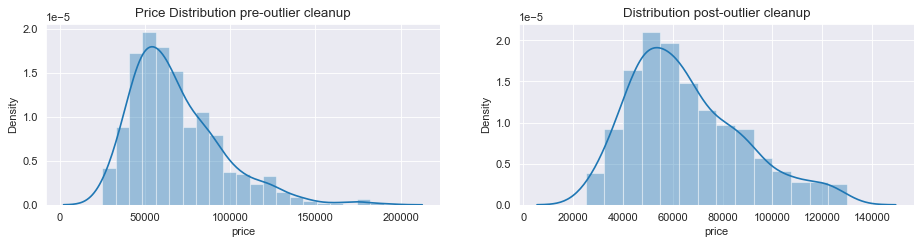

In [16]:
plt.figure(figsize=(14,3),dpi=80)
plt.subplot(121)
sns.distplot(house['price'])
plt.title('Price Distribution pre-outlier cleanup')

plt.subplot(122)
sns.distplot(house_df2['price'])
plt.title('Distribution post-outlier cleanup')

plt.show()

The target 'price' is less skewed without outliers 

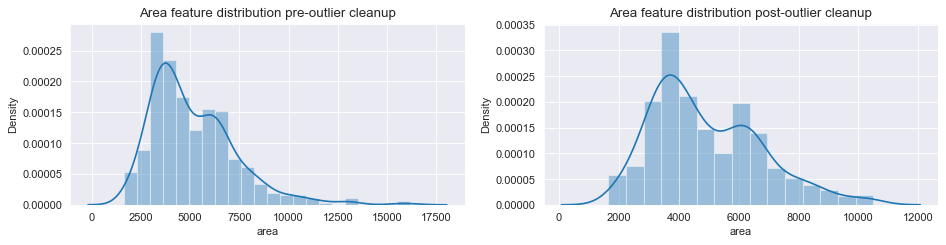

In [17]:
plt.figure(figsize=(14,3),dpi=80)
plt.subplot(121)
sns.distplot(house['area'])
plt.title('Area feature distribution pre-outlier cleanup')

plt.subplot(122)
sns.distplot(house_df2['area'])
plt.title('Area feature distribution post-outlier cleanup')

plt.show()

The feature 'Area' is less skewed without outliers 

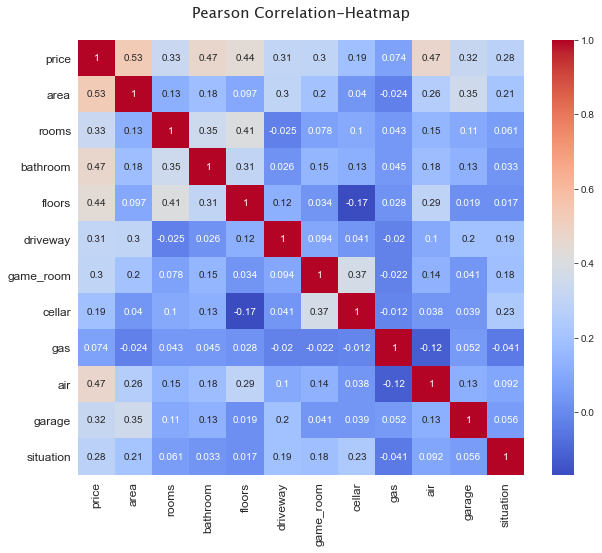

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(house_df2.corr('pearson'), annot=True, cmap="coolwarm",fmt='.2g',cbar=True)
plt.title('Pearson Correlation-Heatmap\n',fontsize=15, fontname='Lucida Sans Unicode')
plt.xticks(fontsize=12,rotation='90')
plt.yticks(fontsize=12)
plt.show()

1. From the above heatmap we could see that, all the features either have medium or low correlation, there are no features with high correlation.

2. We could possible drop gas and cellar, as they have the poorest correlation of all.

In [19]:
col = house_df2.columns
for i in col:
    x = house_df2[str(i)].nunique()
    print(f'{i}:',x)

price: 205
area: 268
rooms: 6
bathroom: 3
floors: 4
driveway: 2
game_room: 2
cellar: 2
gas: 2
air: 2
garage: 4
situation: 2


The above list confirms that there are no columns with zero variance or 1 unique value

In [20]:
'''Features, Variables excluding outliers based on boxplot'''

X = house_df2.iloc[:,1:]
y = house_df2.iloc[:,0:1]

'''Features, Variables excluding outliers based on boxplot eyeball estimated'''

X_ee = house_df1.iloc[:,1:]
y_ee = house_df1.iloc[:,0:1]

'''Features, Variables with outliers'''

X_wo = house.iloc[:,1:]
y_wo = house.iloc[:,0:1]

In the above block, I have split the data into three parts:
1. excluding outliers based on statistical boxplot 
2. excluding outliers based on eyeball estimation
3. including outliers

In [21]:
def r_squared_value(X_input,y_input):
    '''UD Function to return r-squared value between each feature and target variable'''
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    scale = StandardScaler()
    model =  LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=0.3, random_state=101)
    cols = X_train.columns
    r_sq = []
    for i in cols:
        X_train_scaled = scale.fit_transform(X_train[[i]])
        reg_result = model.fit(X_train_scaled,y_train)
        r_squared = round(reg_result.score(X_train_scaled,y_train),3)
        r_sq.append(r_squared)
        print(f'{i}:', r_squared)
    plt.figure(figsize=(10,3),dpi=80)
    sns.barplot(cols,r_sq)
    plt.title('Target vs Feature R-squared\n',fontsize=13)
    plt.xlabel('\nFeatures\n',fontsize=12)
    plt.ylabel('R-squared value',fontsize=12)
    plt.xticks(rotation='45')

The above function compares individual feature with target varaible and returns the R-squared value. This function can be used to assess the linearity in features. The function also visualizes the R-squared values using barplot. 

area: 0.288
rooms: 0.087
bathroom: 0.209
floors: 0.209
driveway: 0.114
game_room: 0.113
cellar: 0.04
gas: 0.008
air: 0.211
garage: 0.084
situation: 0.056


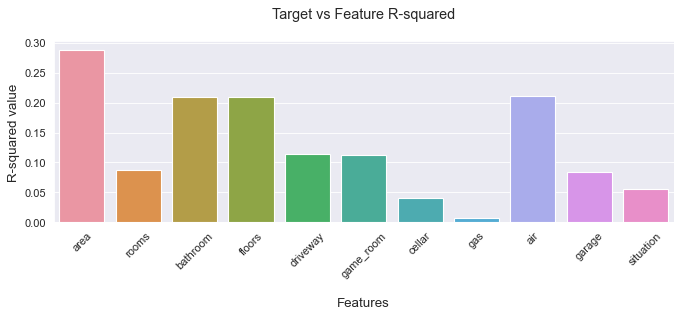

In [22]:
r_squared_value(X,y)

In [23]:
reordered_cols = ['area', 'air', 'bathroom', 'floors', 'driveway', 'game_room','rooms', 'garage','situation','cellar', 'gas'] 

In [24]:
def ordered_selection(X_input,y_input,order_list):
    '''UD Function to return r-squared value in the input order. For example if a,b,c,d is the order, the funtion returns r-squared for (feature 'a' vs target), (feature 'a','b' vs target), (feature 'a','b','c' vs target) and so no. '''
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    scale = StandardScaler()
    lm = LinearRegression()
    new_list = []
    r_sq_train_ = []
    r_sq_test_ = []
    for i in order_list:
        new_list.append(i)
        X_train, X_test, y_train, y_test = train_test_split(X_input[new_list], y_input, test_size=0.2, random_state=101)
        X_train_scaled = scale.fit_transform(X_train)
        X_test_scaled = scale.fit_transform(X_test)
        lm_result = lm.fit(X_train_scaled,y_train)
        r_sqr_train = round(lm_result.score(X_train_scaled,y_train),2)
        r_sqr_test = round(lm_result.score(X_test_scaled,y_test),2)
        r_sq_train_.append(r_sqr_train)
        r_sq_test_.append(r_sqr_test)
    print('Training R_sq:',r_sq_train_)
    print('Test R_sq:',r_sq_test_)

In [25]:
ordered_selection(X,y,reordered_cols)

Training R_sq: [0.28, 0.39, 0.5, 0.55, 0.57, 0.59, 0.59, 0.6, 0.62, 0.63, 0.64]
Test R_sq: [0.3, 0.45, 0.58, 0.64, 0.65, 0.65, 0.65, 0.67, 0.69, 0.7, 0.71]


In [26]:
X_wo.drop(columns=['outlier_eyeball','outlier_boxplot'],axis=1,inplace=True)

area: 0.316
rooms: 0.155
bathroom: 0.272
floors: 0.195
driveway: 0.083
game_room: 0.057
cellar: 0.014
gas: 0.008
air: 0.195
garage: 0.163
situation: 0.121


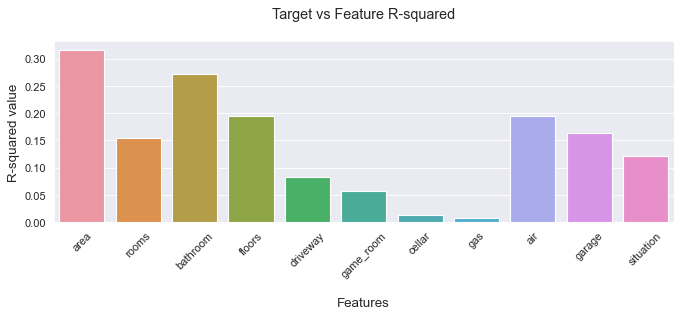

In [27]:
r_squared_value(X_wo, y_wo)

In [28]:
reordered_cols2 = ['area', 'bathroom','air', 'floors', 'garage','rooms','situation','driveway','game_room','cellar', 'gas'] 

In [29]:
ordered_selection(X_wo,y_wo,reordered_cols2)

Training R_sq: [0.29, 0.47, 0.56, 0.59, 0.61, 0.61, 0.65, 0.65, 0.66, 0.66, 0.67]
Test R_sq: [0.23, 0.38, 0.42, 0.48, 0.49, 0.5, 0.53, 0.55, 0.57, 0.6, 0.58]


In [30]:
X_ee.drop(columns=['outlier_eyeball','outlier_boxplot'],axis=1,inplace=True)

area: 0.258
rooms: 0.12
bathroom: 0.249
floors: 0.185
driveway: 0.09
game_room: 0.098
cellar: 0.025
gas: 0.015
air: 0.19
garage: 0.122
situation: 0.131


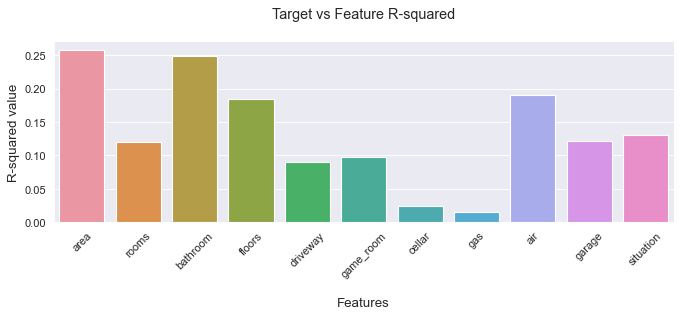

In [31]:
r_squared_value(X_ee, y_ee)

In [32]:
reordered_cols3 = ['area', 'bathroom','air', 'floors','situation', 'garage','rooms','game_room','driveway','cellar', 'gas'] 

In [33]:
ordered_selection(X_ee,y_ee,reordered_cols3)

Training R_sq: [0.25, 0.42, 0.5, 0.55, 0.58, 0.61, 0.61, 0.63, 0.64, 0.64, 0.65]
Test R_sq: [0.37, 0.51, 0.6, 0.62, 0.61, 0.6, 0.6, 0.61, 0.63, 0.65, 0.66]


In [34]:
def feature_selection(X_input,y_input):
    '''This function creates all unique combinations of features and returns the R-squared value as DataFrame'''
    feature_combinations = []
    from itertools import combinations
    import numpy as np
    for i in np.arange(1,len(X_input.columns)+1): 
        for comb in combinations(X_input.columns, i):            
            feature_combinations.append(list(comb))           
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    scale = StandardScaler()
    lm = LinearRegression()
    r_sq_train_ = []
    r_sq_test_ = []
    for i in feature_combinations:
        X_train, X_test, y_train, y_test = train_test_split(X_input[i], y_input, test_size=0.2, random_state=101)
        X_train_scaled = scale.fit_transform(X_train)
        X_test_scaled = scale.fit_transform(X_test)
        lm_result = lm.fit(X_train_scaled,y_train)
        r_sqr_train = round(lm_result.score(X_train_scaled,y_train),4)
        r_sqr_test = round(lm_result.score(X_test_scaled,y_test),4)
        r_sq_train_.append(r_sqr_train)
        r_sq_test_.append(r_sqr_test)
    result = pd.concat([pd.Series(feature_combinations),pd.DataFrame(r_sq_train_), pd.DataFrame(r_sq_test_)],axis='columns')  
    result.columns = ['Combination','R_sq_train','R_sq_test']
    return result

I have written this funtion, which will create multiple unique combination of variables, run it via the linear regression module and retun the R-squared value as DataFrame. In the HousePrice dataset the funtion has executed 2046 unique combinations of features.

In [35]:
Output1 = feature_selection(X,y) ## dataset excluding outliers based on statistical boxplot 
Output2 = feature_selection(X_wo,y_wo) ## dataset excluding outliers based on eyeball estimation
Output3 = feature_selection(X_ee,y_ee) ## dataset including outliers

In [36]:
display(Output1[Output1.R_sq_test == Output1.R_sq_test.max()])

,Combination,R_sq_train,R_sq_test
2040,"[area, rooms, bathroom, floors, driveway, cell...",0.6315,0.7138


#### The best possible R-squared that I was able to identify was 0.71 for testing dataset and the combination of variables with the highest R-squared is given below. 

#### The analysis for the House Price dataset was performed to identify the best R-squared value for dataset, however from a model perspective, we could still have areas to improve by assessing metrics such as p-value, F-statistic, MSE, etc.

In [37]:
print('The best combination of variables with highest training and testing R-squared is\n',
    Output1.iat[2040,0])

The best combination of variables with highest training and testing R-squared is
 ['area', 'rooms', 'bathroom', 'floors', 'driveway', 'cellar', 'gas', 'air', 'garage', 'situation']
